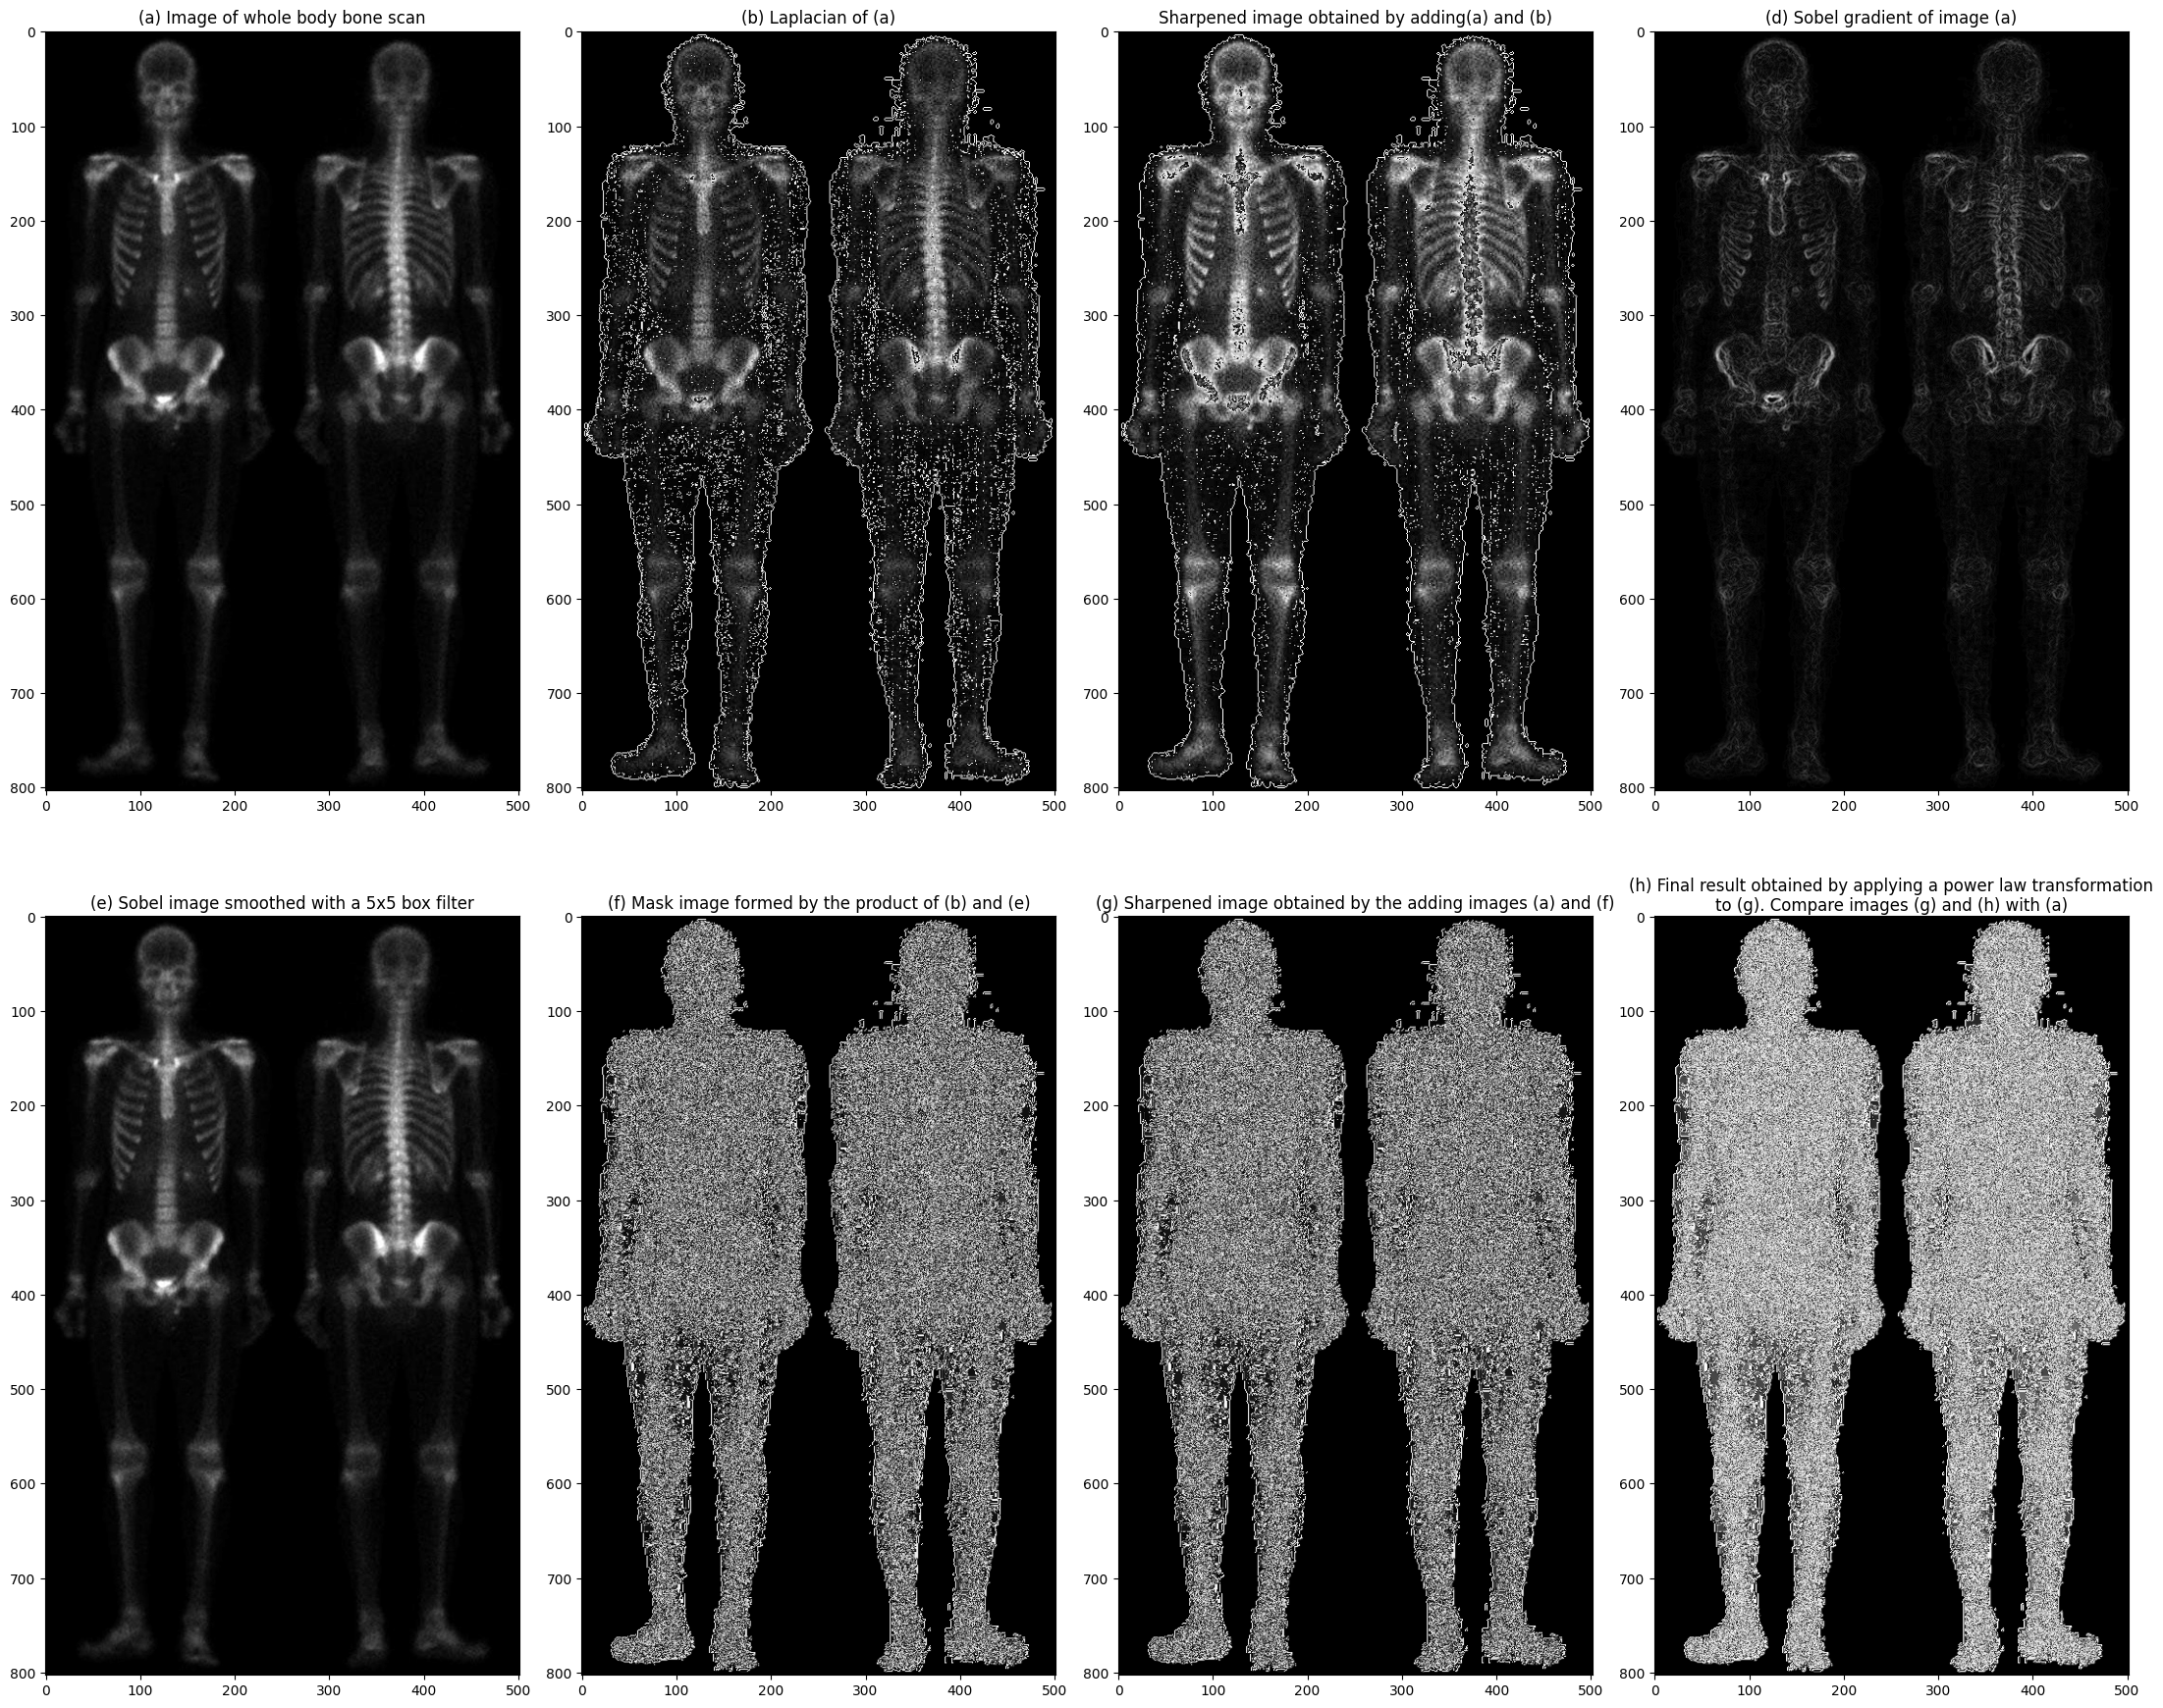

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
class highpass_filter(object):
    def __init__(self,image) -> None:
        self.img=image
    def init_kernel(self, kernel_name:str):
        if kernel_name=="Laplacian":
            return self.show_Laplacian()
        elif kernel_name=="Sobel":
            return self.show_SmoothedSobel()
        else:
            return self.img
    def Convolution2D(self,kernel):
        m, n = self.img.shape
        img_new = np.zeros([m, n])
        for i in range(1, m-1):
            for j in range(1, n-1):
                temp=  self.img[i-1, j-1]    * kernel[0, 0]\
                    +  self.img[i, j-1]      * kernel[0, 1]\
                    +  self.img[i+1, j - 1]  * kernel[0, 2]\
                    +  self.img[i-1, j]      * kernel[1, 0]\
                    +  self.img[i, j]        * kernel[1, 1]\
                    +  self.img[i+1, j]      * kernel[1, 2]\
                    +  self.img[i - 1, j+1]  * kernel[2, 0]\
                    +  self.img[i, j + 1]    * kernel[2, 1]\
                    +  self.img[i + 1, j + 1]* kernel[2, 2]
                img_new[i, j]= temp
        img_new = img_new.astype(np.uint8)
        return img_new
    def show_Laplacian(self):
        Laplacian_kerner = np.array(([0, 1, 0], [1, -4, 1], [0, 1, 0]),
                                    dtype="float")
        return self.img-self.Convolution2D(Laplacian_kerner)
    def show_SobelX(self):
        SobelX = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]), dtype="float")
        return self.Convolution2D(SobelX)
    def show_SobelY(self):
        SobelY = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype="float")
        return self.Convolution2D(SobelY)
    def show_SmoothedSobel(self):
        return self.show_SobelX()+self.show_SobelY()+self.img
if __name__=='__main__':
    image = cv2.imread('D:/xray.ppm', 0)
    fig=plt.figure(figsize=(22, 18))
    ax=fig.subplots(2,4)
    ax[0,0].set_title("(a) Image of whole body bone scan")
    ax[0,0].imshow(image,cmap="gray")
    Laplacian=highpass_filter(image).init_kernel("Laplacian")
    ax[0,1].imshow(Laplacian,cmap='gray')
    ax[0,1].set_title("(b) Laplacian of (a)")
    sharpened_image = image + Laplacian
    ax[0,2].imshow(sharpened_image,cmap='gray')
    ax[0,2].set_title("Sharpened image obtained by adding(a) and (b)")
    gradient_x = np.gradient(image, axis=1)
    gradient_y = np.gradient(image, axis=0)
    sobel_gradient = np.sqrt(gradient_x**2 + gradient_y**2)
    ax[0,3].imshow(sobel_gradient,cmap='gray')
    ax[0,3].set_title("(d) Sobel gradient of image (a)")
    sobel=highpass_filter(image).init_kernel("Sobel")
    ax[1,0].set_title("(e) Sobel image smoothed with a 5x5 box filter")
    ax[1,0].imshow(image,cmap="gray")
    mask_image = Laplacian * sobel
    ax[1,1].imshow(mask_image,cmap='gray')
    ax[1,1].set_title("(f) Mask image formed by the product of (b) and (e)")
    sharpened_image = image + mask_image
    ax[1,2].imshow(sharpened_image,cmap='gray')
    ax[1,2].set_title("(g) Sharpened image obtained by the adding images (a) and (f)")
    gamma = 0.5
    final_result = np.power(sharpened_image / np.max(sharpened_image), gamma) * 255
    ax[1,3].imshow(final_result,cmap='gray')
    ax[1,3].set_title("(h) Final result obtained by applying a power law transformation to (g). Compare images (g) and (h) with (a)"
                      , loc='center', wrap=True)
    plt.tight_layout()
    plt.show()